In [4]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\AMAN GUPTA\Downloads\data (4) (1).xlsx'
data = pd.read_excel(file_path)


# Display basic information about the dataset
print("Data Shape:", data.shape)
print("Column Names:", data.columns)
print("Missing Values:\n", data.isnull().sum())
print("Data Types:\n", data.dtypes)
print(data.head())


C:\Users\AMAN GUPTA\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Data Shape: (377719, 7)
Column Names: Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'],
      dtype='object')
Missing Values:
 time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64
Data Types:
 time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp              object
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object
                 time Cyclone_Inlet_Gas_Temp Cyclone_Material_Temp  \
0 2017-01-01 00:00:00                 867.63                910.42   
1 2017-01-01 00:05:00                 879.23       

In [5]:
# Convert columns to numeric, with non-numeric values set as NaN
for column in data.columns[1:]:  # Skip 'time' column
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Check for missing values
print("Missing Values After Conversion:\n", data.isnull().sum())

# Fill missing values using forward fill then backward fill to maintain continuity
data = data.fillna(method='ffill').fillna(method='bfill')


Missing Values After Conversion:
 time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64


In [6]:
from sklearn.ensemble import IsolationForest

# Define the feature columns (excluding time)
features = data.columns[1:]

# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[features])

# Identify anomalies
anomalies = data[data['anomaly'] == -1]
print("Number of Anomalies Detected:", anomalies.shape[0])
print("Sample Anomalies:\n", anomalies.head())


Number of Anomalies Detected: 3778
Sample Anomalies:
                     time  Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
6374 2017-01-23 03:10:00                  571.57                 424.36   
6379 2017-01-23 03:35:00                  532.63                 393.36   
6385 2017-01-23 04:05:00                  481.73                 325.87   
6389 2017-01-23 04:25:00                  460.71                 318.89   
6390 2017-01-23 04:30:00                  450.37                 307.50   

      Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
6374                    -10.39              -23.81                   561.75   
6379                    -14.97              -30.54                   522.49   
6385                    -10.26              -25.06                   465.56   
6389                    -10.15              -25.65                   446.25   
6390                    -12.02              -26.14                   436.50   

      Cyclone_Inlet_

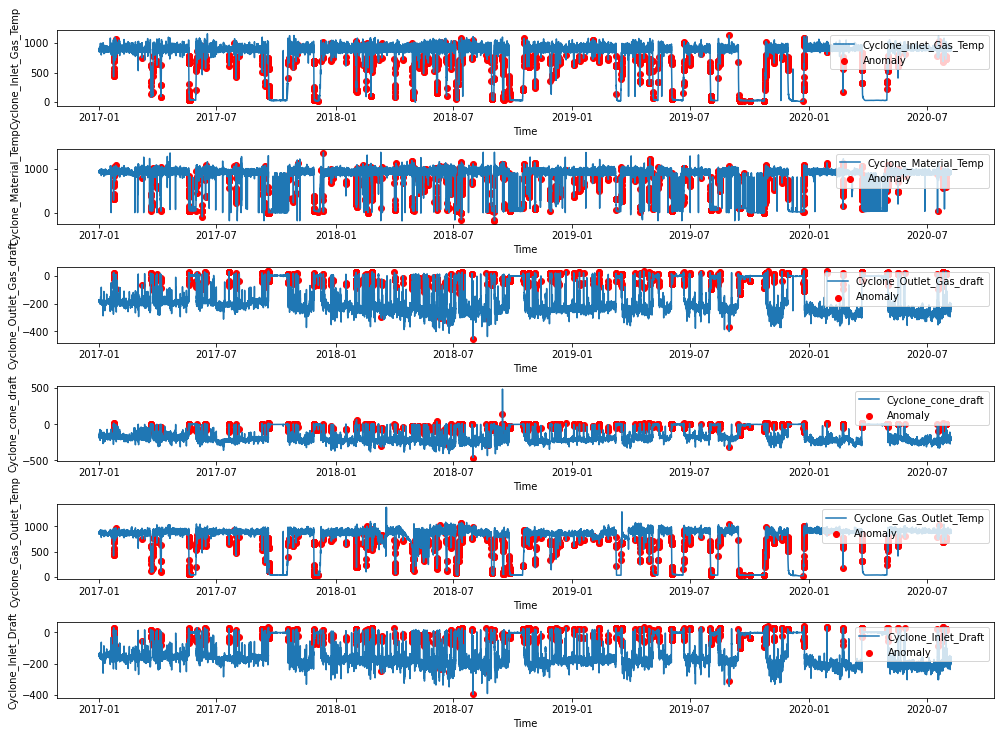

In [7]:
import matplotlib.pyplot as plt

# Plot each variable with anomalies highlighted
plt.figure(figsize=(14, 10))
for i, col in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    plt.plot(data['time'], data[col], label=col)
    plt.scatter(anomalies['time'], anomalies[col], color='red', label='Anomaly')
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [8]:
# Save the data with anomalies for further inspection
data.to_csv(r'C:\Users\AMAN GUPTA\Downloads\Cyclone_Anomalies_Flagged.csv', index=False)
